In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

In [2]:
data=pd.read_csv('house_ren.csv')

In [3]:
data.describe(include='all')

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [4]:
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [5]:
# here i have drop a column which is unuseful in this
data.drop(data.columns[[0]], axis=1) 

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [6]:
# here i am defining dependent and independent variables 

x=data[['Sqft','Floor','TotalFloor','Bedroom','Living.Room', 'Bathroom']]
y=data[['Price']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y,test_size=0.2)

In [9]:
x_Train.describe()
#here i hav3e checked weatgher train test worked or not i have not selected random state 0 so these are in random

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,1531.167372,6.085271,10.930233,2.831395,1.821705,1.831395
std,783.118805,4.009273,5.058778,1.028083,0.465503,0.708247
min,359.358000,1.000000,3.000000,1.000000,0.000000,0.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000
75%,1894.635000,8.000000,14.000000,4.000000,2.000000,2.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg=LinearRegression()

In [12]:
reg.fit(x_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([[   35.50185746,   783.47588198,   310.72444353, -1117.48356741,
        -2288.34640818,  3102.88401708]])

In [14]:
reg.intercept_

array([1403.89171029])

In [15]:
reg.score(x_Train,y_Train)
#high r square means my model not explainng much that mean some imp. feature is missing in my model 

0.6839986799617547

In [16]:
prediction=reg.predict(x_Test)

In [17]:
prediction

array([[ 71553.71492183],
       [ 29303.31927494],
       [ 43363.62713233],
       [ 32741.546468  ],
       [ 47001.42414169],
       [ 68034.64310612],
       [ 60779.8611728 ],
       [ 35909.5658459 ],
       [ 66097.63837664],
       [120603.87095908],
       [ 41336.57865632],
       [ 36425.58989025],
       [ 36756.56333095],
       [ 45010.42151003],
       [ 43747.26542171],
       [ 32137.24679572],
       [ 35635.37001886],
       [ 62425.77663802],
       [ 69514.90380452],
       [ 58771.14828588],
       [ 78019.78834816],
       [ 35171.81714005],
       [ 55119.64546825],
       [ 90474.12921013],
       [ 40551.43582681],
       [ 77539.58946931],
       [ 29216.46372161],
       [ 65362.12656344],
       [ 59356.36711436],
       [ 29265.21541307],
       [ 23641.61249669],
       [ 58350.47202452],
       [ 46407.68100922],
       [ 48175.50944892],
       [ 42277.3279759 ],
       [ 72024.15805618],
       [ 78063.32990424],
       [ 44410.08997128],
       [ 835

Text(0, 0.5, 'prediction')

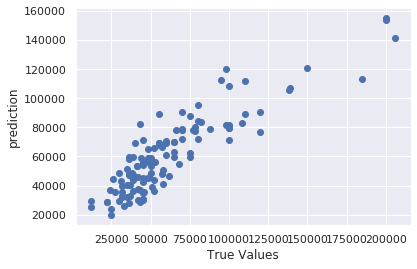

In [18]:
plt.scatter(y_Test,prediction)
plt.xlabel("True Values")
plt.ylabel("prediction")

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
s=StandardScaler()

In [21]:
s.fit(x_Train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
x_train_scaled=s.transform(x_Train)

In [23]:
x_train_scaled

array([[ 0.66695498, -0.02128916, -0.77766728,  1.13778648,  0.38338659,
         0.23828999],
       [-1.0475584 , -0.52061683, -0.77766728, -0.80946998, -1.76691209,
        -1.17501618],
       [ 0.68059832, -0.270953  , -0.38193127,  1.13778648,  0.38338659,
         0.23828999],
       ...,
       [ 0.45775706, -1.01994449,  0.60740876,  1.13778648,  0.38338659,
         0.23828999],
       [ 0.59419048, -0.270953  ,  0.21167275,  0.16415825,  0.38338659,
         0.23828999],
       [ 2.06312369, -1.01994449,  2.78395682,  1.13778648,  0.38338659,
         0.23828999]])

In [26]:
reg.fit(x_train_scaled,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.score(x_train_scaled,y_Train)

0.6839986799617548